In [1]:
ex1 = """\
47|53
97|13
97|61
97|47
75|29
61|13
75|53
29|13
97|29
53|29
61|53
97|53
61|29
47|13
75|47
97|75
47|61
75|61
47|29
75|13
53|13

75,47,61,53,29
97,61,53,29,13
75,29,13
75,97,47,61,53
61,13,29
97,13,75,29,47"""

143


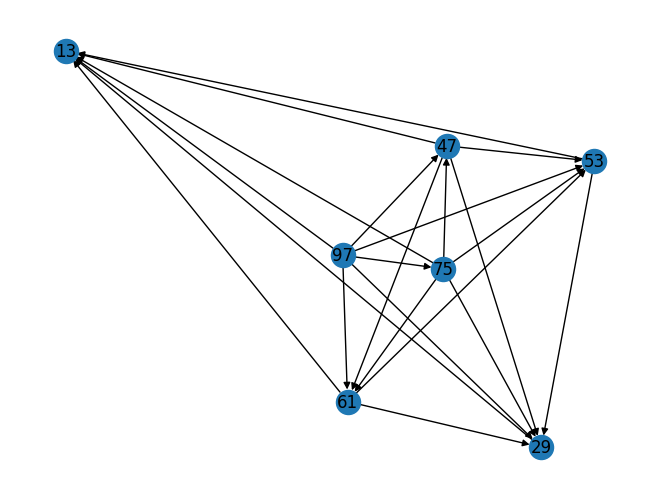

In [2]:
import networkx as nx 

def process_inputs(input: str) -> tuple[list, list]:
    rules, update = input.split('\n\n')
    rules = [r.split("|") for r in rules.split('\n')]
    update = [u.split(",") for u in update.split('\n')]
    return rules, update


def test_line(g: nx.Graph, line: list) -> bool:
    h = g.subgraph(line)
    return nx.is_path(h, line)


def part1(input: str, draw: bool = False):
    rules, update = process_inputs(input)

    g = nx.DiGraph(rules)
    if draw:
        nx.draw(g, with_labels=True)
    
    total = 0
    for line in update:
        if test_line(g, line):
            total += int(line[int(len(line)/2)])
    print(total)        

part1(ex1, draw=True)

In [3]:
input = open("inputs/05.txt").read()
part1(input)

7198


In [4]:
def fix_line(g: nx.Graph, line: list) -> list:
    h = g.subgraph(line)
    return list(nx.all_topological_sorts(h))[0]

def part2(input: str, draw: bool = False):
    rules, update = process_inputs(input)

    g = nx.DiGraph(rules)
    if draw:
        nx.draw(g, with_labels=True)
    
    total = 0
    
    for line in update:
        if not test_line(g, line):
            fixed_line = fix_line(g, line)
            total += int(fixed_line[int(len(fixed_line)/2)])
    print(total)        



In [5]:
part2(ex1)

123


In [6]:
part2(input)

4230
